In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize']=(10,6)

In [2]:
train_dir=r'C:/Users/kavin/OneDrive/Desktop/DL Project/Osteoarthritis_Assignment_dataset/train'
test_dir=r'C:/Users/kavin/OneDrive/Desktop/DL Project/Osteoarthritis_Assignment_dataset/test'
validation_dir=r'C:/Users/kavin/OneDrive/Desktop/DL Project/Osteoarthritis_Assignment_dataset/Valid'

In [4]:
#for converting images into values
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
#Generating batches of tensor image data
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator=test_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2350 images belonging to 2 classes.
Found 2350 images belonging to 2 classes.


In [8]:
from tensorflow.keras.applications import InceptionV3

In [9]:
conv_base=InceptionV3(weights='imagenet',
                     include_top=False,
                     input_shape=(150,150,3))

87910968/87910968 [==============================] - 8s 0us/step


In [10]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [18]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               4718848   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26,521,889
Trainable params: 26,487,457
Non-trainable params: 34,432
_________________________________________________________________


In [20]:
from tensorflow.keras import optimizers
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    metrics=['acc']
)

In [21]:
checkpoint=keras.callbacks.ModelCheckpoint("Osteoarthritis_project-{epoch:02d}.h5")

In [22]:
history=model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=20,
            validation_data=validation_generator,
            validation_steps=50,
            callbacks=[checkpoint]
)

C:\Users\kavin\AppData\Local\Temp\ipykernel_13764\2256855114.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/20
100/100 [==============================] - 258s 2s/step - loss: 0.5287 - acc: 0.7215 - val_loss: 0.4803 - val_acc: 0.7500
Epoch 2/20
100/100 [==============================] - 242s 2s/step - loss: 0.4266 - acc: 0.7905 - val_loss: 0.5327 - val_acc: 0.7110
Epoch 3/20
100/100 [==============================] - 223s 2s/step - loss: 0.4238 - acc: 0.7990 - val_loss: 0.4292 - val_acc: 0.7870
Epoch 4/20
100/100 [==============================] - 222s 2s/step - loss: 0.3599 - acc: 0.8317 - val_loss: 0.3525 - val_acc: 0.8350
Epoch 5/20
100/100 [==============================] - 264s 3s/step - loss: 0.3313 - acc: 0.8503 - val_loss: 0.4417 - val_acc: 0.8260
Epoch 6/20
100/100 [==============================] - 242s 2s/step - loss: 0.3234 - acc: 0.8523 - val_loss: 0.2810 - val_acc: 0.8710
Epoch 7/20
100/100 [==============================] - 253s 3s/step - loss: 0.3341 - acc: 0.8523 - val_loss: 0.2689 - val_acc: 0.8890
Epoch 8/20
100/100 [==============================] - 248s 2s/step - 

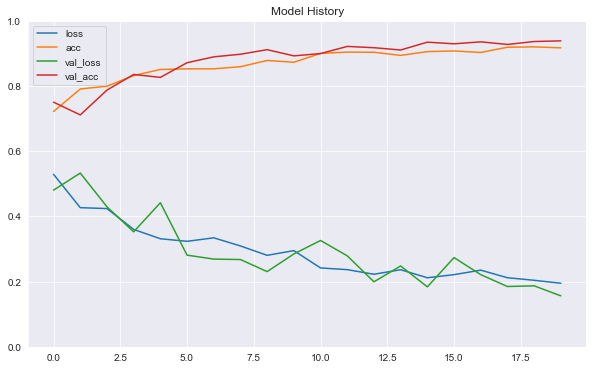

In [25]:
pd.DataFrame(history.history).plot(figsize=(10,6))
import seaborn as sns
sns.set_style('darkgrid')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title('Model History')
plt.show()

In [42]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

In [29]:
model_h5=keras.models.load_model('C:/Users/kavin/Osteoarthritis_project-20.h5')

In [30]:
model_h5

In [43]:
img=image.load_img('C:/Users/kavin/OneDrive/Desktop/DL_Project/Osteoarthritis_Assignment_dataset/train/Osteoarthritis/DoubtfulG1 (27).png',target_size=(150,150))
x=image.img_to_array(img)
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
probability=model.predict(img_data)
print(probability[0][0])

1/1 [==============================] - 1s 906ms/step
0.99999577
